In [67]:
%matplotlib inline
import msprime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import SVG

We want to approximate the SFS. Simulate 100 replicates each consisting of a sample of size n=10 taken from a single panmictic population for a history of an instaneous bottleneck: we assume a step change in Ne to Ne/scal in a single population at time T:

In [84]:
N = 100000
nsamp = 10
Ne = 4.05596e5
T = 2e5

population_configurations = [msprime.PopulationConfiguration(sample_size=nsamp, initial_size=Ne)]
demographic_events = [msprime.InstantaneousBottleneck(time=1000, strength=0.5)]

reps = msprime.simulate(num_replicates = N, population_configurations = population_configurations,
                        demographic_events = demographic_events)

B = np.zeros((N,nsamp))
for j, ts in enumerate(reps):
    tree = next(ts.trees())
    for u in tree.nodes():
        nleaves = tree.num_samples(u)
        if tree.parent(u) != msprime.NULL_NODE:
            B[j,nleaves]+=tree.branch_length(u)
            
sfs=np.mean(B, axis=0)
sfsnorm=sfs/sum(totsfs)

print(sfsnorm[1:])

[ 0.34376924  0.17113812  0.11477476  0.08574219  0.06944838  0.05738481
  0.04911463  0.04224718  0.03818448]


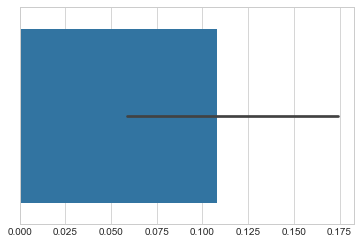

In [83]:
sns.barplot(sfsnorm[1:])

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

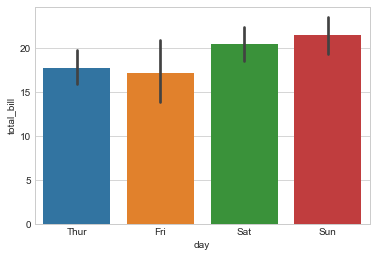